# **Analisis de sentimientos usando redes neuronales recurrentes (RNN)**

En la era digital, la información generada a través de plataformas como las redes
sociales ha crecido exponencialmente, convirtiéndose en una fuente valiosa de datos
para analizar opiniones, tendencias y comportamientos humanos. Twitter, en particular,
se destaca como una de las plataformas más utilizadas para expresar emociones, ideas
y reacciones en tiempo real. Esta riqueza de datos plantea una gran oportunidad, pero
también un desafío: extraer información útil de manera eficiente y precisa.
El análisis de sentimiento (Sentiment Analysis) se ha consolidado como una herramienta
clave para comprender el tono emocional de los usuarios, permitiendo clasificar textos
en categorías como positivo, negativo,neutro o irrelevante. Este proceso es fundamental
en campos como el marketing, la política y la atención al cliente, donde la capacidad de
interpretar y responder a las percepciones del público puede generar ventajas
competitivas significativas



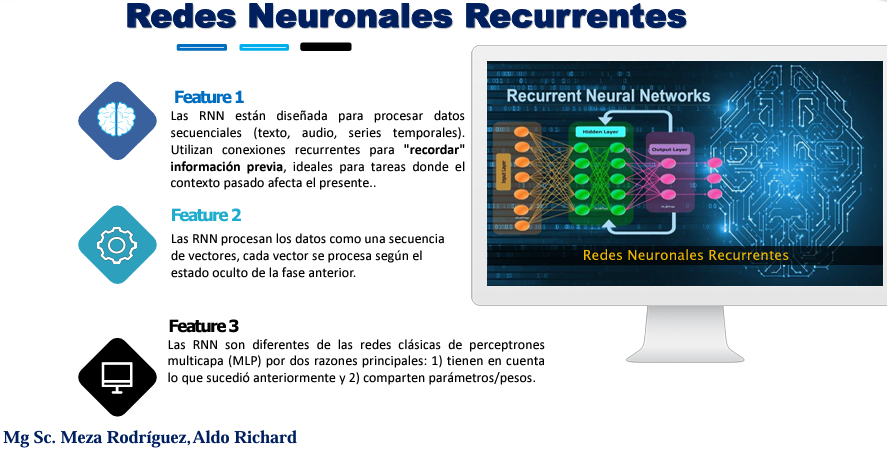

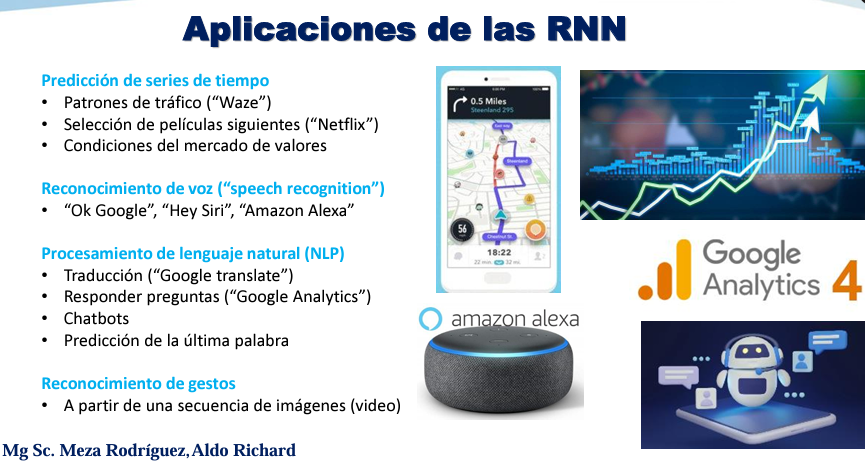

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Cargar el dataset
dataset = pd.read_csv('twitter_training.csv')  # Cambia la ruta del archivo a tu dataset

# Renombrar las columnas
dataset.columns = ['ID', 'Category', 'Rating', 'Review']

# Ver las primeras filas del dataset
print(dataset.head())

# Ver las primeras filas del dataset
dataset

     ID     Category    Rating  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                              Review  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


,ID,Category,Rating,Review
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
#  ver clases del dataset
dataset['Rating'].value_counts()

# Separa las características (reseñas) y el objetivo (calificaciones o etiquetas)
target = dataset.iloc[:, 2].values.tolist()  # Column 3 (índice 2): Rating
data = dataset.iloc[:, 3].values.tolist()    # Column 4 (índice 3): Review

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
cutoff = int(len(data) * 0.80)
x_train, x_test = data[:cutoff], data[cutoff:]
y_train, y_test = target[:cutoff], target[cutoff:]

# Mostrar un ejemplo de los datos de entrenamiento
print(x_train[100])
print(y_train[100])

Grounded almost was pretty cool even despite the top tier unfunny writing until we became yet another annoying crafting game. I seriously can’t wait on this shitty trend to die
Negative


In [ ]:
tokenizer = Tokenizer()
# Asegurarse de que los textos sean cadenas de texto
data = dataset['Review'].astype(str).values.tolist()

# Ahora ajustamos el tokenizer a los textos
tokenizer.fit_on_texts(data)

# Convertir la columna 'Review' a cadena de texto (asegura que no haya valores no textuales)
dataset['Review'] = dataset['Review'].astype(str)

# Tokenización de los textos
num_words = 3000  # Número máximo de palabras en el vocabulario
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(data)  # Ajustar el tokenizer a los textos

# Convertir los textos de x_train y x_test a cadenas de texto (si no lo son ya)
x_train = [str(text) for text in x_train]
x_test = [str(text) for text in x_test]

# Ahora, convierte los textos a secuencias de enteros
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

# Calcular el número de tokens (palabras) en cada texto
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

# Calcular la longitud máxima de los textos para el padding
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
print(f"Longitud máxima de tokens: {max_tokens}")

# Aplicar padding a las secuencias de tokens para que todas tengan la misma longitud
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

Longitud máxima de tokens: 41


In [ ]:
# Verificar las formas de las secuencias
print(f"x_train_pad shape: {x_train_pad.shape}")
print(f"x_test_pad shape: {x_test_pad.shape}")

# Crear el modelo
model = Sequential()

# Capa de embedding
model.add(Embedding(input_dim=num_words,  # Tamaño del vocabulario
                    output_dim=200,  # Tamaño del embedding
                    input_length=max_tokens))  # Longitud de las secuencias

# Capa GRU
model.add(GRU(units=16, return_sequences=True))  # Unidades GRU
model.add(GRU(units=8, return_sequences=False))  # Unidades GRU
model.add(Dense(16, activation='relu'))  # 4 clases posibles (ajustar si es necesario)

# Capa de salida (para clasificación multi-clase, usando 'softmax')
model.add(Dense(4, activation='softmax'))  # 4 clases posibles (ajustar si es necesario)

# Optimización
optimizer = Adam(learning_rate=1e-3)

x_train_pad shape: (59744, 41)
x_test_pad shape: (14937, 41)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy',  # Pérdida para clasificación con etiquetas enteras
              optimizer=optimizer,
              metrics=['accuracy'])


In [ ]:
# Convertir las etiquetas a formato numérico
class_mapping = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])

# Asegurarte de que las etiquetas sean enteros
print(y_train[:10])  # Verifica algunas etiquetas convertidas


[1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Entrenar el modelo
model.fit(x_train_pad, np.array(y_train), epochs=5, batch_size=32)

Epoch 1/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.4954 - loss: 1.1426
Epoch 2/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.7343 - loss: 0.7066
Epoch 3/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8106 - loss: 0.5199
Epoch 4/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - accuracy: 0.8596 - loss: 0.3888
Epoch 5/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.8866 - loss: 0.3103


In [ ]:
# Evaluar el modelo
accuracy = model.evaluate(x_test_pad, np.array(y_test))
print(f"Test Accuracy: {accuracy[1] * 100:.2f}%")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test_pad)

# Ver las probabilidades predichas para cada clase
print("Predicciones de probabilidades para cada clase:")
print(y_pred)

# Convertir las probabilidades de las predicciones en clases
y_pred = model.predict(x_test_pad)  # Realiza las predicciones sobre el conjunto de prueba

# Para cada predicción, obtenemos el índice de la clase con la probabilidad más alta
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar las clases predichas
print("Predicciones para el conjunto de prueba:")
print(y_pred_classes)

467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4382 - loss: 2.2133
Test Accuracy: 43.26%
467/467 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step
Predicciones de probabilidades para cada clase:
[[1.0070991e-03 9.8142660e-01 1.4306511e-02 3.2597384e-03]
 [4.9318857e-03 4.5021057e-02 9.4959939e-01 4.4769203e-04]
 [3.6346614e-01 5.5347491e-02 5.6462812e-01 1.6558388e-02]
 ...
 [4.8932198e-02 3.4909185e-02 4.5583192e-02 8.7057549e-01]
 [3.4342036e-02 6.5723881e-02 2.4330951e-01 6.5662456e-01]
 [6.5459466e-01 1.9492488e-02 3.1675154e-01 9.1612209e-03]]
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
Predicciones para el conjunto de prueba:
[1 2 2 ... 3 3 0]


In [ ]:
# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 41, 200)               │         600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (32, 41, 16)                │          10,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (32, 8)                     │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 16)                    │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 4)                     │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,833,902 (7.00 MB)

 Trainable params: 611,300 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,222,602 (4.66 MB)

In [ ]:
# Ejemplo de cómo convertir un texto a predicción
# Nuevos textos para predecir
text1 = "This product exceeded my expectations, I am very happy with my purchase!"
text2 = "The service was very bad, I won't buy here again"
text3 = "I need to dance."
text4= "The product bad."
texts = [text1, text2, text3, text4]

# Preprocesar los nuevos textos
texts_tokens = tokenizer.texts_to_sequences(texts)
texts_pad = pad_sequences(texts_tokens, maxlen=max_tokens)

# Realizar las predicciones para estos nuevos textos
new_predictions = model.predict(texts_pad)
# Para cada predicción, obtenemos la clase con la probabilidad más alta
new_predictions_classes = np.argmax(new_predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
# Mostrar las clases predichas para los nuevos textos
print("Predicciones para los nuevos textos:")
for i, text in enumerate(texts):
    print(f"Texto: {text}")
    print(f"Clase predicha: {['Negative', 'Positive', 'Neutral', 'Irrelevant'][new_predictions_classes[i]]}")

Predicciones para los nuevos textos:
Texto: This product exceeded my expectations, I am very happy with my purchase!
Clase predicha: Positive
Texto: The service was very bad, I won't buy here again
Clase predicha: Negative
Texto: I need to dance.
Clase predicha: Positive
Texto: The product bad.
Clase predicha: Negative


# **CONCLUSIONES:**

1. Mejora en el Entrenamiento: El modelo logró una mejora notable en precisión
durante el entrenamiento, alcanzando un 88.66% al final de las 5 épocas.
2. Problemas de Generalización: La precisión en el conjunto de prueba fue baja
(43.26%), lo que indica sobreajuste y limita la capacidad del modelo para
generalizar.
3. Preprocesamiento Efectivo: El preprocesamiento, incluyendo tokenización y
padding, fue crucial para el funcionamiento adecuado del modelo con datos de
texto.
4. Mejoras Futuras: Se pueden aplicar técnicas de regularización y ajustar la
arquitectura para mejorar la capacidad de generalización del modelo.